# Quality of Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import unicodecsv
%matplotlib inline

# Research Question : Of all the pitchers who pitched in the 2010 postseason did the pitchers who made less money perform better or did the pitchers who made more money perform better? 

In [119]:
filename = 'C:/Users/Plo/Intro to Data Analysis/final project/Pitching.csv'
filename2 = 'C:/Users/Plo/Intro to Data Analysis/final project/PitchingPost.csv'
filename3 = 'C:/Users/Plo/Intro to Data Analysis/final project/Salaries.csv'

In [120]:
pitchingReg_df = pd.read_csv(filename)
pitchingPost_df = pd.read_csv(filename2)
Salaries_df = pd.read_csv(filename3)

# Data Wrangling Phase

In [121]:
# Subsetting the Regular season pitching data to get the columns from the original dataframe I want for my analysis
# The Regular season data while not included in the research question is used in the analysis as a way to compare
# the performance of the postseason pitchers to their regular season performance

# I label ERA as Adj_ERA because I had to do some vectorized operations on the postseason data in order to get
# their ERA for the entirety of the innings they pitched in the postseason. The postseason pitching data was divided
# up by series. Therefore, I performed the same calculation on the regular season data as I did on the postseason data. 
# I divided the number of earned runs given up by each pitcher by the number of IPouts and multiplied that result by 9. 
# This was done for the reason season data for each pitcher, as well as the postseason data for each pitcher.

# WHIP is another metric used to measure statistical performance of pitchers. It is calculated in a similiar way to ERA. 
# The total number of BB, or walks, plus H, or hits, is added together and divided by IPouts.

Pitching_Reg_Stats_2010 = pitchingReg_df[pitchingReg_df['yearID'] == 2010][['playerID','IPouts','ER', 'BB', 'H']]
Pitching_Reg = pd.DataFrame(Pitching_Reg_Stats_2010.groupby('playerID', as_index = False).sum())
Pitching_Reg['Adj_ERA_Reg'] = (Pitching_Reg['ER'] / Pitching_Reg['IPouts']) * 9
Pitching_Reg['Normalized_ERA_Reg'] = (Pitching_Reg['Adj_ERA_Reg'] - Pitching_Reg['Adj_ERA_Reg'].mean()) / \
Pitching_Reg['Adj_ERA_Reg'].std()
Pitching_Reg['WHIP_Reg'] = (Pitching_Reg['H'] + Pitching_Reg['BB']) / (Pitching_Reg['IPouts']) 
Pitching_Reg['Adj_ERA_Reg'].describe()


count    635.000000
mean       1.723611
std        1.585883
min        0.000000
25%        1.098919
50%        1.417808
75%        1.842739
max       22.500000
Name: Adj_ERA_Reg, dtype: float64

In [122]:
# Subsetting the Regular season pitching data to get the columns from the original dataframe I want for my analysis.

Pitching_Post_Stats_2010 = pitchingPost_df[pitchingPost_df['yearID'] == 2010][['playerID','IPouts','ER', 'H', 'BB']]
Pitching_Post = pd.DataFrame(Pitching_Post_Stats_2010.groupby('playerID', as_index = False).sum())
Pitching_Post['Adj_ERA_Post'] = Pitching_Post['ER'] / Pitching_Post['IPouts'] * 9
Pitching_Post['Normalized_ERA_Post'] = (Pitching_Post['Adj_ERA_Post'] - Pitching_Post['Adj_ERA_Post'].mean()) / \
Pitching_Post['Adj_ERA_Post'].std()
Pitching_Post['WHIP_Post'] = (Pitching_Post['H'] + Pitching_Post['BB']) / (Pitching_Post['IPouts'])
Pitching_Post['Adj_ERA_Post'].describe()

count    85.000000
mean      1.669042
std       3.301029
min       0.000000
25%       0.000000
50%       0.725806
75%       1.928571
max      22.500000
Name: Adj_ERA_Post, dtype: float64

In [123]:
# Subsetting the salary data, which will be merged with the regular season data and postseason data in a new dataframe.

Salaries2010 = Salaries_df[Salaries_df['yearID'] == 2010][['playerID', 'salary']]

In [124]:
# Merging the Regular Season and Postseason pitching data

Merge_Post_And_Reg = Pitching_Reg.merge(Pitching_Post, on = 'playerID', how = 'inner')

# Changing the names of a few columns in  the merged dataFrame to be more clear

Merge_Post_And_Reg['IPouts_Reg'] = Merge_Post_And_Reg['IPouts_x']
del Merge_Post_And_Reg['IPouts_x']
Merge_Post_And_Reg['IPouts_Post'] = Merge_Post_And_Reg['IPouts_y']
del Merge_Post_And_Reg['IPouts_y']
Merge_Post_And_Reg['ER_Reg'] = Merge_Post_And_Reg['ER_x']
del Merge_Post_And_Reg['ER_x']
Merge_Post_And_Reg['ER_Post'] = Merge_Post_And_Reg['ER_y']
del Merge_Post_And_Reg['ER_y']

# Merging the Regular Season and Postseason pitching dataFrame with the salary dataFrame. 
# There are a total of 85 pitchers from 2010 who pitched in the postseason. However, there is only salary information
# for 70 of them. I do not have any recourse to determine the missing salary numbers. Therefore, they were obmitted from 
# the Merge_RegPost_Salary dataFrame. 

Merge_RegPost_Salary = Merge_Post_And_Reg.merge(Salaries2010, on = 'playerID', how = 'inner')

# Exploration Phase

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001346C550>]], dtype=object)

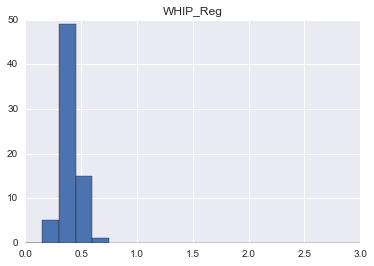

In [125]:
# Histogram of Regular season WHIP for pitchers who pitched in the Postseason.

Merge_RegPost_Salary.hist('WHIP_Reg', bins = 20, range=[0.0, 3.0])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000136C91D0>]], dtype=object)

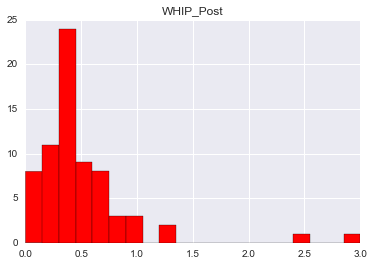

In [126]:
# Histogram of Postseason WHIP.

Merge_RegPost_Salary.hist('WHIP_Post', bins = 20, range=[0.0, 3.0], facecolor = 'red')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000137495F8>]], dtype=object)

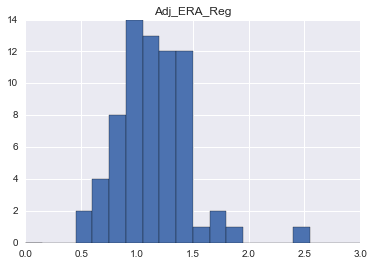

In [127]:
# Histogram of Regular Season ERA for pitchers who pitched in the postseason.

Merge_RegPost_Salary.hist('Adj_ERA_Reg', bins = 20, range=[0.0, 3.0])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001315E908>]], dtype=object)

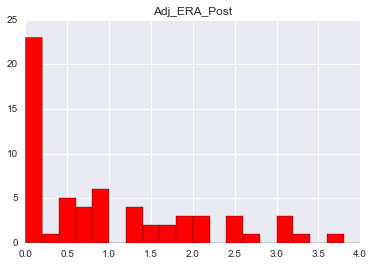

In [128]:
# Histogram of Post Season ERA.

Merge_RegPost_Salary.hist("Adj_ERA_Post", bins = 20, range=[0.0,4.0], facecolor = 'red')

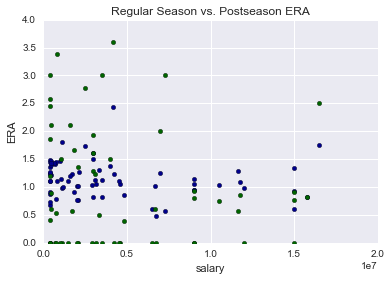

In [129]:
# Scatterplot of regular season data: Salary is x, ERA is y

Ax = Merge_RegPost_Salary.plot.scatter(x = 'salary', y = 'Adj_ERA_Reg', color = 'DarkBlue')
Scatter_Final = Merge_RegPost_Salary.plot.scatter(x = 'salary', y = 'Adj_ERA_Post', color = 'DarkGreen', ax=Ax,\
title = 'Regular Season vs. Postseason ERA')
Scatter_Final.set_xlim([0, 20000000])
Scatter_Final.set_ylim([0, 4])
Scatter_Final.set_xlabel('salary')
Scatter_Final.set_ylabel('ERA')
#df.plot.scatter(x='a', y='b')

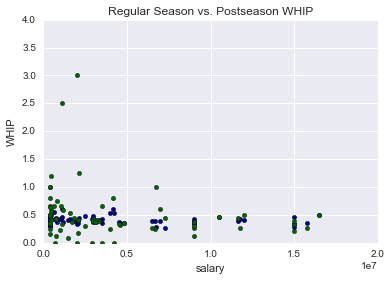

In [130]:
# Scatterplot of Regular season and Postseason data: Salary is x, WHIP is y

Ax = Merge_RegPost_Salary.plot.scatter(x = 'salary', y = 'WHIP_Reg', color = 'DarkBlue')
Scatter_Final = Merge_RegPost_Salary.plot.scatter(x = 'salary', y = 'WHIP_Post', color = 'DarkGreen', ax=Ax,\
title = 'Regular Season vs. Postseason WHIP')
Scatter_Final.set_xlim([0, 20000000])
Scatter_Final.set_ylim([0, 4])
Scatter_Final.set_xlabel('salary')
Scatter_Final.set_ylabel('WHIP')

# Conclusions Phase

The result of the analysis is the pitchers who pitched in the postseason of 2010 and made more money in 2010 generally held their Postseason performance constant to their Regular Season performance. In other words, they performed well in the regular season and they continued that through the Postseason. However, the pitchers who made less money had more variability in their Postseason performance compared to their Regular Season performance. 

A big reason for the higher variability among pitchers who made less money is those pitchers are expected to face fewer batters. In the Postseason, which is a very small sample size of at the most 20 games and at the least 3 games, a pitcher may only enter a game once, and face only one batter. This potential incredibly small sample size could skew the data one way or the other. 

Because of this, it is difficult to say, the way to get better pitching performance is pay a premium for better pitching. It is also difficult to say that if you don't pay a premium, your chances of getting better pitching performances in the Postseason decrease.


Websites Used

1) http://stackoverflow.com/questions/19237878/subsetting-a-python-dataframe
        - Shows how to subset a dataframe
        
2) http://stackoverflow.com/questions/19482970/get-list-from-pandas-dataframe-column-headers
        - Gives a list of column names of the dataframe
        
3) http://stackoverflow.com/questions/7376330/axis-range-in-scatter-graphs
        - how to change axis range of a scatterplot
        
4) http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.DataFrame.hist.html
        - Create a histogram from a column of a dataFrame
        
5) http://stackoverflow.com/questions/12125880/changing-default-x-range-in-histogram-matplotlib
        - changing the range size of horizontal axis for a histogram
        
6) http://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-object-to-dataframe
        - how to turn a grouped object into a dataFrame
        
7) https://plot.ly/matplotlib/histograms/
        - how to change the color of a histogram
        
8) http://pandas.pydata.org/pandas-docs/stable/visualization.html
        - how to put two scatter plots on the same scatter plot diagram and change the color of the dots
        
9) http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html
        - how to get an output of descriptive statistics for a dataframe value
        
10) http://www.reynwar.net/ben/docs/matplotlib/
        - how to label scatter plot x and y axis
